<a href="https://colab.research.google.com/github/tmdcks1103/Machine-Learning-Programming/blob/main/10%EC%A3%BC%EC%B0%A8/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_file(filepath):

    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

In [3]:
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)

    loaded = np.dstack(loaded)
    return loaded

In [4]:
def load_dataset_group(group, prefix=''):
    filepath = prefix + '/' + group + '/Inertial Signals/'
    filenames = list()
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']

    X = load_group(filenames, filepath)
    y = load_file(prefix + '/' + group + '/y_'+group+'.txt')
    return X, y

In [5]:
def load_dataset(prefix=''):
    # 훈련 데이터
    trainX, trainy = load_dataset_group('train', prefix + '/content/drive/MyDrive/Colab Notebooks/10주차/UCI HAR Dataset')
    # 테스트 데이터
    testX, testy = load_dataset_group('test', prefix + '/content/drive/MyDrive/Colab Notebooks/10주차/UCI HAR Dataset')

    trainy = trainy - 1
    testy = testy - 1

    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)

    print(trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)
    return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot

In [6]:
trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()

/tmp/ipython-input-3766181940.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-3766181940.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-3766181940.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-3766181940.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)


(7352, 128, 9) (7352, 1) (7352, 6) (2947, 128, 9) (2947, 1) (2947, 6)


/tmp/ipython-input-3766181940.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)


In [7]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train_one_hot,y_val_one_hot,y_train,y_val=train_test_split(trainX, trainy_one_hot, trainy,test_size=0.2,random_state=100)

X_train.shape,X_val.shape,y_train_one_hot.shape,y_val_one_hot.shape,y_train.shape,y_val.shape

((5881, 128, 9), (1471, 128, 9), (5881, 6), (1471, 6), (5881, 1), (1471, 1))

In [8]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_one_hot.shape[1]

In [14]:
# LSTM 모델 아키텍쳐 정의

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

lstm_model = Sequential()

lstm_model.add(Input(shape=(n_timesteps, n_features)))

In [15]:
# 첫번째 LSTM 레이어
lstm_model.add(LSTM(units=100, return_sequences=True))
lstm_model.add(Dropout(0.3))

In [16]:
# 두번째 LSTM 레이어

lstm_model.add(LSTM(units=100))
lstm_model.add(Dropout(0.3))

In [18]:
lstm_model.add(Dense(128, activation='relu'))

In [19]:
lstm_model.add(Dense(n_outputs, activation='softmax'))

In [20]:
# 컴파일
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 구조 요약 출력
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 128, 100)       │        44,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,614 (603.96 KB)

 Trainable params: 154,614 (603.96 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# 모델 학습

model_history=lstm_model.fit(x=X_train,
                             y=y_train_one_hot,
                             epochs=30,
                             batch_size=32,
                             validation_split=0.1)

Epoch 1/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4578 - loss: 1.2712 - val_accuracy: 0.5976 - val_loss: 0.9343
Epoch 2/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6926 - loss: 0.7073 - val_accuracy: 0.8387 - val_loss: 0.4263
Epoch 3/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8317 - loss: 0.4539 - val_accuracy: 0.9151 - val_loss: 0.2312
Epoch 4/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9240 - loss: 0.2403 - val_accuracy: 0.9219 - val_loss: 0.2106
Epoch 5/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9148 - loss: 0.2434 - val_accuracy: 0.9185 - val_loss: 0.2653
Epoch 6/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8288 - loss: 0.4856 - val_accuracy: 0.9219 - val_loss: 0.2392
Epoch 7/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9163 - loss: 0.2510 - val_accuracy: 0.9542 - val_loss: 0.1589
Epoch 8/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9481 - loss: 0.1591 - val_accu

In [22]:
# 모델 최종 평가 (테스트 데이터)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

pred=lstm_model.predict(testX)

pred=np.argmax(pred, axis=-1)

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [23]:
cm=confusion_matrix(testy,pred)
print("=== 혼동 행렬 (Confusion Matrix) ===")
print(cm)

=== 혼동 행렬 (Confusion Matrix) ===
[[467   0  29   0   0   0]
 [ 15 433  23   0   0   0]
 [  2   2 416   0   0   0]
 [  0   2   0 400  67  22]
 [  1   0   0  90 440   1]
 [  0   0   0   0   0 537]]


In [24]:
print("\n=== 최종 정확도 (Accuracy) ===")
print(accuracy_score(testy,pred))


=== 최종 정확도 (Accuracy) ===
0.9138106549032915


In [25]:
print("\n=== 분류 리포트 (Classification Report) ===")
print(classification_report(testy,pred))


=== 분류 리포트 (Classification Report) ===
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       496
           1       0.99      0.92      0.95       471
           2       0.89      0.99      0.94       420
           3       0.82      0.81      0.82       491
           4       0.87      0.83      0.85       532
           5       0.96      1.00      0.98       537

    accuracy                           0.91      2947
   macro avg       0.91      0.92      0.91      2947
weighted avg       0.91      0.91      0.91      2947




=== 혼동 행렬 시각화 ===


<Axes: >

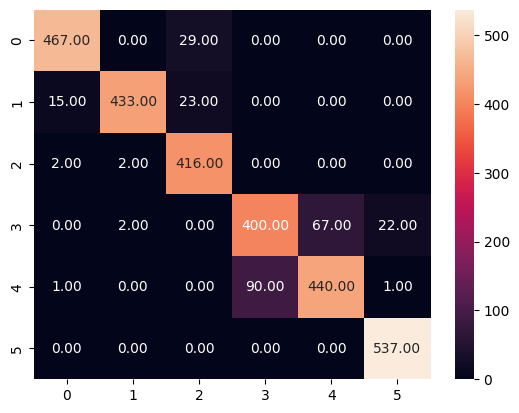

In [26]:
print("\n=== 혼동 행렬 시각화 ===")
sns.heatmap(cm, annot=True, fmt = '.2f')

## CNN 모델과의 차이

- 기존의 병렬&공간적이었던 데이터 처리 방식에서 순차적&시간적으로 변경

- 1번부터 128번까지 순서대로 읽어 내려가는 작동 방식

- 순서와 맥락을 기억하고 이해? (메모리셀)

- 입력 데이터 4번 -> 1번만 넣어주면 됨